<a href="https://colab.research.google.com/github/SXE74810/Assignment5/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

df= pd.read_csv("/content/gdrive/MyDrive/datasets/CC GENERAL.csv")

df.head()
df['TENURE'].value_counts()
x = df.iloc[:,[1,2,3,4]]
y = df.iloc[:,-1]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['CUST_ID'] = le.fit_transform(df.CUST_ID.values)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf.head()

from sklearn.cluster import KMeans
nclusters = 2 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)
scaler = StandardScaler()
X_Scale = scaler.fit_transform(x)

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf1 = pd.concat([principalDf1, df[['TENURE']]], axis = 1)
print(finalDf1.head())

from sklearn.cluster import KMeans
nclusters = 2 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_Scale)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_Scale)
from sklearn import metrics
score = metrics.silhouette_score(X_Scale, y_cluster_kmeans)
print(score)

0.7526240640619958
   principal component 1  principal component 2  TENURE
0              -0.786173               0.422114      12
1              -0.278329              -0.803393      12
2               0.255916              -0.630364      12
3               0.277478               0.873840      12
4              -0.510060              -0.341918      12
0.669864455390754


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
df= pd.read_csv("/content/gdrive/MyDrive/datasets/pd_speech_features.csv")
df.head()
df.shape
df['class'].value_counts()
X = df.drop('class',axis=1).values
y = df['class'].values
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)
pca2 = PCA(n_components=3)
principalComponents = pca2.fit_transform(X_Scale)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()
X_train, X_test, y_train, y_test = train_test_split(X_Scale,y, test_size=0.3,random_state=0)

svc = SVC(max_iter=1000)

svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)

print("svm accuracy =", acc_svc)

svm accuracy = 91.68


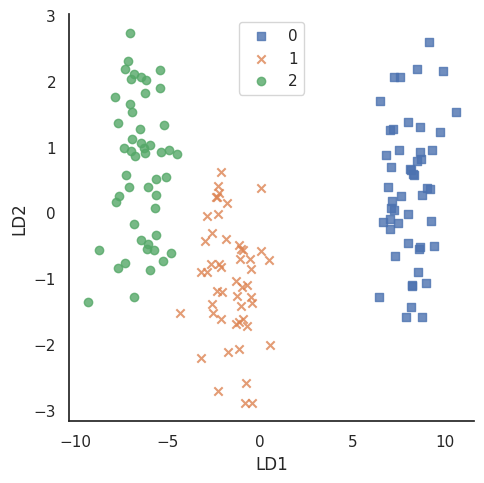

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("/content/gdrive/MyDrive/datasets/Iris.csv")
df.head()

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Species'].values)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()